In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
runcycle=1000
runduration=0.10 
timestep=runduration/runcycle;


In [3]:
# input parameters

L= 2500#in uH
C= 650#in uF
n= 2000 # winding count
Rcoil= 15 # in ohms
Rpara= 1 
R=Rcoil+Rpara

a=R/(2*L*10**-6)
w=1/np.sqrt(L*10**-6*C*10**-6)

V0=15 # in Volts
I0=0

B1=I0
B2=V0/(L*10**-6)/w

C1=V0
C2=0

coil_length=20 #mm
coil_radius=5 #mm
caliber = 25 #mm^2(5mm by 5mm)
load_length=3 #mm
load_mass=15 # grams
u0=4*np.pi*10**-7 #vacuum permeability
u=6.3*10**-3 #iron permeability (H/m)
saturation=0.75 #Teslas
D=1 #mm starting offset

In [4]:
# setup time series
Icyc=np.zeros(runcycle)
Idis=np.zeros(runcycle)
Iflywheel=np.zeros(runcycle)
Vcyc=np.zeros(runcycle)

t=np.linspace(0,runduration,runcycle)

In [5]:
# raw current response
Icyc = B1*np.exp(-a*t)*np.cos(w*t)+B2*np.exp(-a*t)*np.sin(w*t)
#diode clamped state
Idis = max(Icyc)*np.exp((-R*t)/(L*10**-6))


In [6]:
# generate diode flywheel response
insersionPt=0
captured=0
for i in range(runcycle-1):
    if (Icyc[i]>Icyc[i+1] and captured ==0):
        insersionPt=i
        captured=1
Iflywheel=Icyc
Iflywheel[insersionPt:runcycle]=Idis[0:runcycle-insersionPt]

In [7]:
#calculate saturation flux & force
maxforce = saturation**2*caliber*10**-6/2/u0


In [8]:
#generate force, acceleration, veolocity, displacement time series
force=np.zeros(runcycle);
force_raw=np.zeros(runcycle);
dis=np.zeros(runcycle);
v=np.zeros(runcycle);
a=np.zeros(runcycle);

In [9]:
#simulate force transient
iterr = iter(range(runcycle))
next(iterr) # skip first term
for i in iterr:
    if dis[i-1]*1000<D:
        force[i]=(n*Iflywheel[i])**2*u0*caliber*10**-6/2/((D*10**-3-dis[i-1]))**2
        print('before %.4f %.4f %d',dis[i-1],force[i],i)
    elif (D-dis[i-1]*1000 <= 0 and dis[i-1]*1000-D <= coil_length ): # if in coil
        force[i]=(.5-((dis[i-1]*10**3-D)/coil_length))*2* (u*n*Iflywheel[i])**2*caliber*10**-6/2/u0
        print('within %.4f %.4f %d',dis[i-1],.5-((dis[i-1]*10**3-D)/coil_length),i)
    elif dis[i-1]*1000-D-coil_length>0:
        force[i]=-(n*Iflywheel[i])**2*u0*caliber*10**-6/2/((dis[i-1]-D*10**-3-coil_length*10**-3))**2
        print('beyond %.4f %.4f %d',dis[i-1],force[i],i)
    
    force_raw[i]=force[i];
    if force[i]>0:
        force[i] = min(force[i],maxforce);
    else:
        force[i] = -min(-force[i],maxforce);
    
    a[i]=force[i]/(load_mass*10**-3);
    v[i]=v[i-1]+a[i]*timestep;
    dis[i]=dis[i-1]+v[i]*timestep;


before %.4f %.4f %d 0.0 7.206998403731328 1
before %.4f %.4f %d 3.7301939787162975e-06 0.258168421151112 2
before %.4f %.4f %d 7.632500238200004e-06 0.009251552547628513 3
before %.4f %.4f %d 1.1540974199382127e-05 0.00033154690029494916 4
before %.4f %.4f %d 1.5449669191831113e-05 1.1881987727337914e-05 5
before %.4f %.4f %d 1.9358372105605253e-05 4.2584046172967234e-07 6
before %.4f %.4f %d 2.3267075303273033e-05 1.5262249481104425e-08 7
before %.4f %.4f %d 2.7175778511115647e-05 5.47021105469515e-10 8
before %.4f %.4f %d 3.108448171932294e-05 1.9606660978560195e-11 9
before %.4f %.4f %d 3.4993184927543305e-05 7.027766631087739e-13 10
before %.4f %.4f %d 3.8901888135764136e-05 2.519099222988259e-14 11
before %.4f %.4f %d 4.281059134398499e-05 9.029996515230813e-16 12
before %.4f %.4f %d 4.671929455220584e-05 3.2370124923840994e-17 13
before %.4f %.4f %d 5.062799776042669e-05 1.1604215119361144e-18 14
before %.4f %.4f %d 5.453670096864754e-05 4.160081992553015e-20 15
before %.4f %.4f 

within %.4f %.4f %d 0.002388032516276468 0.4305983741861766 612
within %.4f %.4f %d 0.002391941219484689 0.43040293902576554 613
within %.4f %.4f %d 0.0023958499226929097 0.4302075038653545 614
within %.4f %.4f %d 0.0023997586259011305 0.43001206870494346 615
within %.4f %.4f %d 0.0024036673291093513 0.4298166335445324 616
within %.4f %.4f %d 0.002407576032317572 0.4296211983841214 617
within %.4f %.4f %d 0.002411484735525793 0.42942576322371034 618
within %.4f %.4f %d 0.0024153934387340136 0.4292303280632993 619
within %.4f %.4f %d 0.0024193021419422344 0.42903489290288827 620
within %.4f %.4f %d 0.002423210845150455 0.4288394577424772 621
within %.4f %.4f %d 0.002427119548358676 0.4286440225820662 622
within %.4f %.4f %d 0.0024310282515668967 0.42844858742165515 623
within %.4f %.4f %d 0.0024349369547751174 0.4282531522612441 624
within %.4f %.4f %d 0.002438845657983338 0.42805771710083307 625
within %.4f %.4f %d 0.002442754361191559 0.4278622819404221 626
within %.4f %.4f %d 0.00244

In [10]:
#calculate efficiency
outenergy=0.5*(load_mass*10**-3)*v[-1]**2;
inenergy=0.5*(C*10**-6)*V0**2;
effi=100*outenergy/inenergy
print(effi)

0.015669703353800992


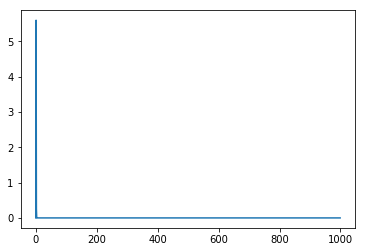

In [13]:
plt.plot(force)

In [12]:
force

array([0.00000000e+000, 5.59529097e+000, 2.58168421e-001, 9.25155255e-003,
       3.31546900e-004, 1.18819877e-005, 4.25840462e-007, 1.52622495e-008,
       5.47021105e-010, 1.96066610e-011, 7.02776663e-013, 2.51909922e-014,
       9.02999652e-016, 3.23701249e-017, 1.16042151e-018, 4.16008199e-020,
       1.49142993e-021, 5.34710594e-023, 1.91712229e-024, 6.87378691e-026,
       2.46466366e-027, 8.83760808e-029, 3.16903784e-030, 1.13641211e-031,
       4.07530543e-033, 1.46150561e-034, 5.24151657e-036, 1.87987830e-037,
       6.74246872e-039, 2.41838102e-040, 8.67455566e-042, 3.11162049e-043,
       1.11620260e-044, 4.00420786e-046, 1.43650627e-047, 5.15366187e-049,
       1.84902149e-050, 6.63415784e-052, 2.38038719e-053, 8.54137009e-055,
       3.06496677e-056, 1.09987281e-057, 3.94709699e-059, 1.41655011e-060,
       5.08399449e-062, 1.82472477e-063, 6.54951300e-065, 2.35093262e-066,
       8.43900166e-068, 3.02943661e-069, 1.08755885e-070, 3.90448675e-072,
       1.40183092e-073, 5